<a href="https://colab.research.google.com/github/SharanyaSD/Student-Performance-Dashboard/blob/main/StudPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("StudentsPerformance.csv")

In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Summary statistics of the dataset
print(df.describe())

# Count the number of missing values in each column
print(df.isnull().sum())

# Count the unique values in categorical columns
print(df['gender'].value_counts())
print(df['race/ethnicity'].value_counts())
print(df['parental level of education'].value_counts())
print(df['lunch'].value_counts())
print(df['test preparation course'].value_counts())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.163

In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Summary statistics of the dataset
print(df.describe())

# Count the number of missing values in each column
print(df.isnull().sum())

# Count the unique values in categorical columns
print(df['gender'].value_counts())
print(df['race/ethnicity'].value_counts())
print(df['parental level of education'].value_counts())
print(df['lunch'].value_counts())
print(df['test preparation course'].value_counts())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.163

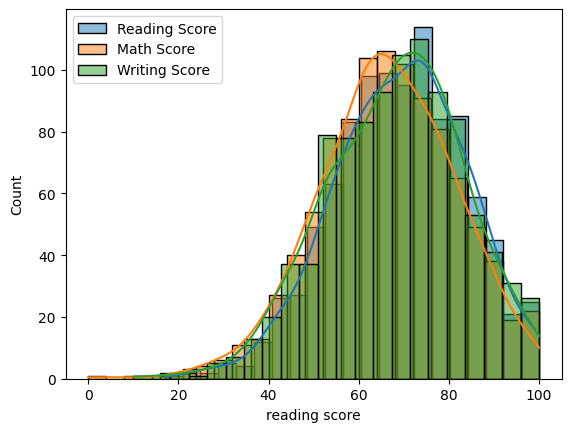

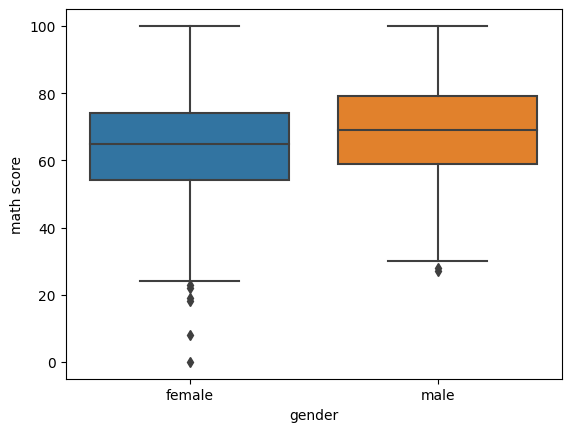

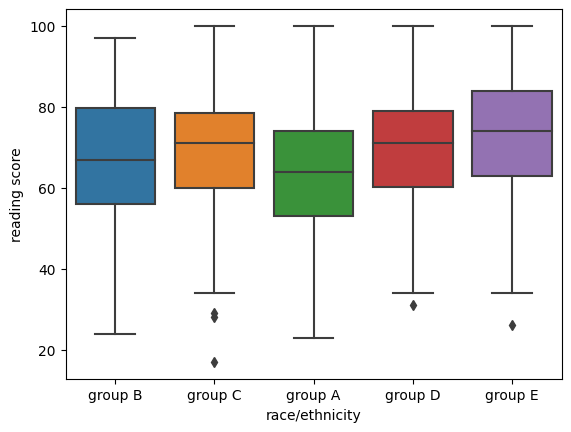

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of scores
sns.histplot(df['reading score'], kde=True, label='Reading Score')
sns.histplot(df['math score'], kde=True, label='Math Score')
sns.histplot(df['writing score'], kde=True, label='Writing Score')
plt.legend()
plt.show()

# Visualize the relationship between scores and categorical variables
sns.boxplot(x='gender', y='math score', data=df)
plt.show()
sns.boxplot(x='race/ethnicity', y='reading score', data=df)
plt.show()


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import gradio as gr

# Assuming the dataset file is named "studentperformance.csv"
df = pd.read_csv("StudentsPerformance.csv")

# Select the features and target variable
features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
target = 'writing score'
X = df[features]
y = df[target]

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Define a function for making predictions
def predict_writing_score(gender, race_ethnicity, parental_education, lunch, test_prep):
    data = pd.DataFrame([[gender, race_ethnicity, parental_education, lunch, test_prep]], columns=features)
    # Perform necessary data preprocessing (e.g., one-hot encoding, label encoding) on the input data
    data_encoded = pd.get_dummies(data)
    
    # Get the list of feature names from the one-hot encoded data
    encoded_features = data_encoded.columns.tolist()
    
    # Find the missing features that were used during training
    missing_features = set(X_encoded.columns.tolist()) - set(encoded_features)
    for feature in missing_features:
        # Add the missing feature with a value of 0
        data_encoded[feature] = 0
    
    # Reorder the columns to match the order used during training
    data_encoded = data_encoded[X_encoded.columns]
    
    prediction = model.predict(data_encoded)[0]
    return prediction


# Define the input and output interfaces for Gradio
# Define the input and output interfaces for Gradio
# Define the input and output interfaces for Gradio
inputs = [
    gr.inputs.Dropdown(choices=['female', 'male'], label="Gender"),
    gr.inputs.Dropdown(choices=['group B', 'group C', 'group D', 'group E'], label="Race/Ethnicity"),
    gr.inputs.Dropdown(choices=['high school', 'some college', 'associate\'s degree',
                                'bachelor\'s degree', 'master\'s degree'], label="Parental Education"),
    gr.inputs.Dropdown(choices=['standard', 'free/reduced'], label="Lunch"),
    gr.inputs.Dropdown(choices=['none', 'completed'], label="Test Preparation")
]
output = gr.outputs.Textbox(label="Predicted Writing Score")

# Create the Gradio interface
iface = gr.Interface(fn=predict_writing_score, inputs=inputs, outputs=output, title="Writing Score Predictor")
iface.launch(share=True)





Mean Squared Error: 216.8178948164126


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:219: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f1afcaac66a3d21cb4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
